# Functions

Many of the Julia functions we have used, such as the math functions, produce return values. But the functions we’ve written are all void: they have an effect, like printing a value or moving a turtle, but they don’t have a return value. In this lecture you will learn to write fruitful functions.

# Return Values

Calling the function generates a return value, which we usually assign to a variable or use as part of an expression.

In [2]:
e = exp(1.0)
radius = 1.0
radians = π/3
height = radius * sin(radians);

The functions we have written so far are void. Speaking casually, they have no return value; more precisely, their return value is `nothing`:

In [6]:
function print_n(s, n)
    for i in 1:n
        println(s)
    end
end
println(print_n("Hello, World!", 3))

Hello, World!
Hello, World!
Hello, World!
nothing


In this lecture, we are (finally) going to write fruitful functions. The first example is area, which returns the area of a circle with the given radius:

In [1]:
function area(radius)
    a = π * radius^2
    return a
end

area (generic function with 1 method)

We have seen the return statement before, but in a fruitful function the return statement includes an expression. This statement means: “Return immediately from this function and use the following expression as a return value.” The expression can be arbitrarily complicated, so we could have written this function more concisely:

In [2]:
function area(radius)
    return π * radius^2
end

area (generic function with 1 method)

On the other hand, *temporary variables* like `a` can make debugging easier.

Sometimes it is useful to have multiple return statements, one in each branch of a conditional:

In [3]:
function absolute_value(x)
    if x < 0
        return -x
    else
        return x
    end
end

absolute_value (generic function with 1 method)

Since these return statements are in an alternative conditional, only one runs.

As soon as a return statement runs, the function terminates without executing any subsequent statements. Code that appears after a return statement, or any other place the flow of execution can never reach, is called *dead code*.

In a fruitful function, it is a good idea to ensure that every possible path through the program hits a return statement. For example:

In [5]:
function absolute_value(x)
    if x < 0
        return -x
    end
    if x > 0
        return x
    end
end

absolute_value (generic function with 1 method)

This function is incorrect because if `x` happens to be 0, neither condition is true, and the function ends without hitting a return statement. If the flow of execution gets to the end of a function, the return value is `nothing`, which is not the absolute value of 0.

In [9]:
println(absolute_value(0))

nothing


By the way, Julia provides a built-in function called `abs` that computes absolute values.

The *return type* can be specified in Julia and the returned value is converted to this type if possible:

In [13]:
function absolute_value(x) :: Float64
    if x < 0
        return -x
    end
    x
end
absolute_value(-3)

3.0

The `return` keyword is not needed for the final expression in a function body. Its value is automatically returned.

In Python the return type can not be specified and the `return` keyword is compulsory:
```python
def absolute_value(x):
    if x < 0:
        return -x
    return x
```

In C++ the return type has to be specified as the first element of the header and the `return` keyword is also compulsory:
```C++
double absolute_value(double x){
    if (x < 0.0) {
        return -x;
    }
    return x;
}
```
The type of the arguments needs to be specified. In Julia this is also possible but this will be explained later.

# Incremental Development

As you write larger functions, you might find yourself spending more time debugging.

To deal with increasingly complex programs, you might want to try a process called incremental development. The goal of incremental development is to avoid long debugging sessions by adding and testing only a small amount of code at a time.

As an example, suppose you want to find the distance between two points, given by the coordinates $(x_1, y_1)$ and $(x_2, y_2)$. By the Pythagorean theorem, the distance is:

$$
d = \sqrt{(x_2 − x_1)^2 + (y_2 − y_1)^2}
$$

The first step is to consider what a distance function should look like in Julia. In other words, what are the inputs (parameters) and what is the output (return value)?

In this case, the inputs are two points, which you can represent using four numbers. The return value is the distance represented by a floating-point value.

Immediately you can write an outline of the function:

In [16]:
function distance(x₁, y₁, x₂, y₂)
    0.0
end

distance (generic function with 1 method)

Obviously, this version doesn’t compute distances; it always returns zero. But it is syntactically correct, and it runs, which means that you can test it before you make it more complicated.

To test the new function, call it with sample arguments:

In [17]:
distance(1, 2, 4, 6)

0.0

I chose these values so that the horizontal distance is 3 and the vertical distance is 4; that way, the result is 5, the hypotenuse of a 3-4-5 triangle. When testing a function, it is useful to know the right answer.

At this point we have confirmed that the function is syntactically correct, and we can start adding code to the body. 

A reasonable next step is to find the differences $x_2 − x_1$ and $y_2 − y_1$. The next version stores those values in temporary variables and prints them:

In [18]:
function distance(x₁, y₁, x₂, y₂)
    dx = x₂ - x₁
    dy = y₂ - y₁
    println("dx is ", dx)
    println("dy is ", dy)
    0.0
end

distance (generic function with 1 method)

If the function is working, it should display `"dx is 3"` and `"dy is 4"`. If so, we know that the function is getting the right arguments and performing the first computation correctly. If not, there are only a few lines to check.

In [19]:
distance(1, 2, 4, 6)

dx is 3
dy is 4


0.0

Next we compute the sum of squares of `dx` and `dy`:

In [20]:
function distance(x₁, y₁, x₂, y₂)
    dx = x₂ - x₁
    dy = y₂ - y₁
    d² = dx^2 + dy^2
    print("d² is ", d²)
    0.0
end

distance (generic function with 1 method)

Again, you would run the program at this stage and check the output (which should be 25).

In [21]:
distance(1, 2, 4, 6)

d² is 25

0.0

Finally, you can use `sqrt` to compute and return the result:

In [2]:
function distance(x₁, y₁, x₂, y₂)
    dx = x₂ - x₁
    dy = y₂ - y₁
    d² = dx^2 + dy^2
    sqrt(d²)
end

distance (generic function with 1 method)

If that works correctly, you are done.

In [25]:
distance(1, 2, 4, 6)

5.0

The final version of the function doesn’t display anything when it runs; it only returns a value. The print statements we wrote are useful for debugging, but once you get the function working, you should remove them. Code like that is called *scaffolding* because it is helpful for building the program but is not part of the final product.

When you start out, you should add only a line or two of code at a time. As you gain more experience, you might find yourself writing and debugging bigger chunks. Either way, incremental development can save you a lot of debugging time.

The key aspects of the process are:

1. Start with a working program and make small incremental changes. At any point, if there is an error, you should have a good idea where it is.

2. Use variables to hold intermediate values so you can display and check them.

3. Once the program is working, you might want to remove some of the scaffolding or consolidate multiple statements into compound expressions, but only if it does not make the program difficult to read.

# Composition

As you should expect by now, you can call one function from within another. As an example, we’ll write a function that takes two points, the center of the circle and a point on the perimeter, and computes the area of the circle.

Assume that the center point is stored in the variables $x_c$ and $y_c$, and the perimeter point is in $x_p$ and $y_p$. The first step is to find the radius of the circle, which is the distance between the two points. We just wrote a function, distance, that does that:
```julia
radius = distance(xc, yc, xp, yp)
```
The next step is to find the area of a circle with that radius; we just wrote that, too:
```julia
result = area(radius)
```

Encapsulating these steps in a function, we get:

In [3]:
function circle_area(xc, yc, xp, yp)
    radius = distance(xc, yc, xp, yp)
    result = area(radius)
end

circle_area (generic function with 1 method)

The temporary variables `radius` and `result` are useful for development and debugging, but once the program is working, we can make it more concise by composing the function calls:

In [4]:
function circle_area(xc, yc, xp, yp)
    area(distance(xc, yc, xp, yp))
end
circle_area(1, 2, 4, 6)

78.53981633974483

# Boolean functions

Functions can return booleans (values of type `Bool`), which is often convenient for hiding complicated tests inside functions. For example:

In [30]:
function is_divisible(x, y) :: Bool
    if mod(x, y) == 0
        return true
    else
        return false
    end
end

is_divisible (generic function with 1 method)

It is common to give boolean functions names that sound like yes/no questions; `is_divisible` returns either `true` or `false` to indicate whether `x` is divisible by `y`.
Here is an example:

In [31]:
is_divisible(6, 4)

false

The result of the `==` operator is a boolean, so we can write the function more concisely by returning it directly:

In [ ]:
function is_divisible(x, y)
    mod(x, y) == 0
end

Boolean functions are often used in conditional statements:

In [32]:
x = 6
y = 3
if is_divisible(x, y)
    println(x, " is divisible by ", y)
end

6 is divisible by 3


It might be tempting to write something like:

In [33]:
if is_divisible(x, y) == true
    println(x, " is divisible by ", y)
end

6 is divisible by 3


But the extra comparison is unnecessary.

# More recursion

We have only covered a small subset of Julia (Python, C++), but you might be interested to know that this subset is a complete programming language, which means that anything that can be computed can be expressed in this language. Any program ever written could be rewritten using only the language features you have learned so far (actually, you would need a few commands to control devices like the mouse, disks, etc., but that’s all).

Proving that claim is a nontrivial exercise first accomplished by Alan Turing, one of the first computer scientists (some would argue that he was a mathematician, but a lot of computer scientists started as mathematicians). Accordingly, it is known as the Turing Thesis.

To give you an idea of what you can do with the tools you have learned so far, we’ll evaluate a few recursively defined mathematical functions. A recursive definition is similar to a circular definition, in the sense that the definition contains a reference to the thing being defined. A truly circular definition is not very useful:

*vorpal*: 

    An adjective used to describe something that is vorpal.

If you saw that definition in the dictionary, you might be annoyed. On the other hand, if you looked up the definition of the factorial function, denoted with the symbol !, you might get something like this:
\begin{align}
    0! &= 1\nonumber\\ 
 	n! &= n (n−1)!\nonumber
\end{align}
This definition says that the factorial of $0$ is $1$, and the factorial of any other value, $n$, is $n$ multiplied by the factorial of $n−1$.

So $3!$ is $3$ times $2!$, which is $2$ times $1!$, which is $1$ times $0!$. Putting it all together, $3!$ equals $3$ times $2$ times $1$ times $1$, which is $6$.

If you can write a recursive definition of something, you can write a Julia program to evaluate it. The first step is to decide what the parameters should be. In this case it should be clear that `my_factorial` takes an integer:

In [35]:
function my_factorial(n) end

my_factorial (generic function with 1 method)

If the argument happens to be 0, all we have to do is return 1:

In [36]:
function my_factoral(n)
    if n == 0
        return 1
    end
end

my_factoral (generic function with 1 method)

Otherwise, and this is the interesting part, we have to make a recursive call to find the factorial of `n−1` and then multiply it by `n`:

In [82]:
function my_factorial(n)
    if n == 0
        return 1
    else
        recurse = my_factorial(n-1)
        result = n * recurse
        return result
    end
end
my_factorial(3)

6

The flow of execution for this program is similar to the flow of `countdown`:

Since 3 is not 0, we take the second branch and calculate the factorial of `n-1`...
- Since 2 is not 0, we take the second branch and calculate the factorial of `n-1`...
    - Since 1 is not 0, we take the second branch and calculate the factorial of `n-1`...
        - Since 0 equals 0, we take the first branch and return 1 without making any more recursive calls.
    - The return value, 1, is multiplied by `n`, which is 1, and the result is returned.
- The return value, 1, is multiplied by `n`, which is 2, and the result is returned.
The return value 2 is multiplied by `n`, which is 3, and the result, 6, becomes the return value of the function call that started the whole process.

The return values are shown being passed back up the stack. In each frame, the return value is the value of `result`, which is the product of `n` and `recurse`.

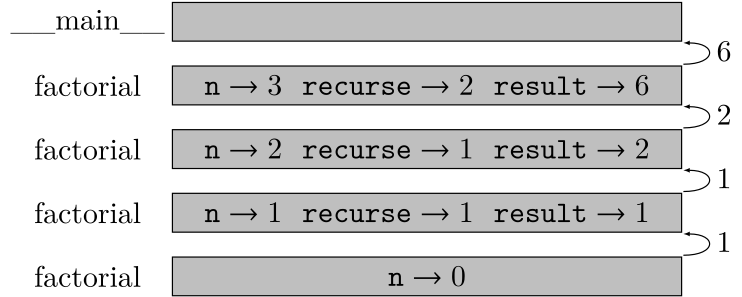

In [71]:
using TikzPictures
TikzPicture(L"""
    \node (main) [draw, fill=lightgray, minimum width=6cm] {$\phantom{3}$};
    \node [left of=main, xshift=-3cm] {\textrm{\_\_main\_\_}};
    \node (c1) [draw, fill=lightgray, below of=main, yshift=0.25cm, minimum width=6cm] {$\textrm{\tt n}\rightarrow3\ \ \textrm{\tt recurse}\rightarrow2\ \ \textrm{\tt result}\rightarrow6$};
    \node [left of=c1, xshift=-3cm] {$\textrm{factorial}$};
    \node (c2) [draw, fill=lightgray, below of=c1, yshift=0.25cm, minimum width=6cm] {$\textrm{\tt n}\rightarrow2\ \ \textrm{\tt recurse}\rightarrow1\ \ \textrm{\tt result}\rightarrow2$};
    \node [left of=c2, xshift=-3cm] {$\textrm{factorial}$};
    \node (c3) [draw, fill=lightgray, below of=c2, yshift=0.25cm, minimum width=6cm] {$\textrm{\tt n}\rightarrow1\ \ \textrm{\tt recurse}\rightarrow1\ \ \textrm{\tt result}\rightarrow1$};
    \node [left of=c3, xshift=-3cm] {$\textrm{factorial}$};
    \node (c4) [draw, fill=lightgray, below of=c3, yshift=0.25cm, minimum width=6cm] {$\textrm{\tt n}\rightarrow0$};
    \node [left of=c4, xshift=-3cm] {$\textrm{factorial}$};
    \draw [-latex](c4.north east) to[out=0,in=0,distance=0.4cm] (c3.south east);
    \draw [-latex](c3.north east) to[out=0,in=0,distance=0.4cm] (c2.south east);
    \draw [-latex](c2.north east) to[out=0,in=0,distance=0.4cm] (c1.south east);
    \draw [-latex](c1.north east) to[out=0,in=0,distance=0.4cm] (main.south east);
    \node [right of=c4, xshift=2.5cm, yshift=0.4cm] {$1$};
    \node [right of=c3, xshift=2.5cm, yshift=0.4cm] {$1$};
    \node [right of=c2, xshift=2.5cm, yshift=0.4cm] {$2$};
    \node [right of=c1, xshift=2.5cm, yshift=0.4cm] {$6$};
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

In the last frame, the local variables `recurse` and `result` do not exist, because the branch that creates them does not run.

# Leap of faith

Following the flow of execution is one way to read programs, but it can quickly become overwhelming. An alternative is what I call the “leap of faith”. When you come to a function call, instead of following the flow of execution, you assume that the function works correctly and returns the right result.

In fact, you are already practicing this leap of faith when you use built-in functions. When you call `cos` or `exp`, you don’t examine the bodies of those functions. You just assume that they work because the people who wrote the built-in functions were good programmers.

The same is true when you call one of your own functions. For example, we wrote a function called `is_divisible` that determines whether one number is divisible by another. Once we have convinced ourselves that this function is correct —by examining the code and testing— we can use the function without looking at the body again.

The same is true of recursive programs. When you get to the recursive call, instead of following the flow of execution, you should assume that the recursive call works (returns the correct result) and then ask yourself, “Assuming that I can find the factorial of $n−1$, can I compute the factorial of $n$?” It is clear that you can, by multiplying by $n$.

Of course, it’s a bit strange to assume that the function works correctly when you haven’t finished writing it, but that’s why it’s called a leap of faith!

# One more example

After `factorial`, the most common example of a recursively defined mathematical function is fibonacci, which has the following definition:

 	 	fibonacci(0) = 0 
 	 	fibonacci(1) = 1 
 	 	fibonacci(n) = fibonacci(n−1) + fibonacci(n−2)

Translated into Julia, it looks like this:

In [76]:
function fibonnaci(n)
    if n == 0
        return 0
    elseif n == 1
        return 1
    else
        return fibonnaci(n-1) + fibonnaci(n-2)
    end
end
fibonnaci(7)

13

If you try to follow the flow of execution here, even for fairly small values of `n`, your head explodes. But according to the leap of faith, if you assume that the two recursive calls work correctly, then it is clear that you get the right result by adding them together.

# Checking types

What happens if we call `my_factorial` and give it 1.5 as an argument?

In [85]:
my_factorial(1.5)

LoadError: [91mStackOverflowError:[39m

It looks like an infinite recursion. How can that be? The function has a base case—when `n == 0`. But if `n` is not an integer, we can miss the base case and recurse forever.

In the first recursive call, the value of `n` is 0.5. In the next, it is -0.5. From there, it gets smaller (more negative), but it will never be 0.

We have two choices. We can try to generalize the factorial function to work with floating-point numbers, or we can make factorial check the type of its argument. The first option is called the gamma function and it’s a little beyond the scope of this course. So we’ll go for the second.

In [10]:
function my_factorial(n::Int)
    if n < 0
        println("Factorial is not defined for negative integers.")
        return
    elseif n == 0
        return 1
    else
        recurse = my_factorial(n-1)
        result = n * recurse
        return result
    end
end

my_factorial (generic function with 1 method)

Attention to make this work and to remove the previous definition without type declarations, we have to restart the kernel. Details will follow in the lecture about *Methods*.

In [13]:
my_factorial(1.5)

LoadError: [91mMethodError: no method matching my_factorial(::Float64)[0m
Closest candidates are:
  my_factorial([91m::Int64[39m) at In[10]:2[39m

The specification of the argument type `Int` blocks nonintegers; the inclusion of a new base excludes negative integers. In the first case a `MethodError` is generated and in the second, the program prints an error message and returns `nothing` to indicate that something went wrong.

If we get past both checks, we know that `n` is positive or zero, so we can prove that the recursion terminates.

This program demonstrates a pattern sometimes called a *guardian*. The first conditional acts as guardians, protecting the code that follows from values that might cause an error. The guardians make it possible to prove the correctness of the code.

Later we will see a more flexible alternative to printing an error message: throwing an *exception*.

# Debugging

Breaking a large program into smaller functions creates natural checkpoints for debugging. If a function is not working, there are three possibilities to consider:

1. There is something wrong with the arguments the function is getting; a precondition is violated.
2. There is something wrong with the function; a postcondition is violated.
3. There is something wrong with the return value or the way it is being used.

To rule out the first possibility, you can add a print statement at the beginning of the function and display the values of the parameters (and maybe their types). Or you can write code that checks the preconditions explicitly by specifying the argument types in the function header.

If the parameters look good, add a print statement before each return statement and display the return value. If possible, check the result by hand. Consider calling the function with values that make it easy to check the result.

If the function seems to be working, look at the function call to make sure the return value is being used correctly (or used at all!).

Adding print statements at the beginning and end of a function can help make the flow of execution more visible. For example, here is a version of factorial with print statements:

In [9]:
function my_factorial(n::Int)
    space = " " ^ (4 * n)
    println(space, "factorial ", n)
    if n == 0
        println(space, "returning 1")
        return 1
    else
        recurse = my_factorial(n-1)
        result = n * recurse
        println(space, "returning ", result)
        return result
    end
end

my_factorial (generic function with 1 method)

`space` is a string of space characters that controls the indentation of the output.

In [10]:
my_factorial(4)

                factorial 4
            factorial 3
        factorial 2
    factorial 1
factorial 0
returning 1
    returning 1
        returning 2
            returning 6
                returning 24


24

If you are confused about the flow of execution, this kind of output can be helpful. It takes some time to develop effective scaffolding, but a little bit of scaffolding can save a lot of debugging.